<a href="https://colab.research.google.com/github/war-riz/object-detection-demo/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# See The World Through AI

## Day 1: Setup & Image Detection

Goal : Set up YOLO and detect objects in a single image.
- Install and import YOLO (Ultralytics YOLOv8)
- Load pretrained Module
- Run inference on an Image
- Display results

YOLO - You Only Look Once

In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

In [ ]:
upload = files.upload()
file_name = list(upload.keys())[0]
print("Uploaded:", file_name)

Saving four-person.jpg to four-person (1).jpg
Uploaded: four-person (1).jpg


In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
results = model(file_name)
annotated = results[0].plot()


image 1/1 /content/four-person (1).jpg: 480x640 6 persons, 6 cars, 1 backpack, 4 handbags, 202.6ms
Speed: 6.2ms preprocess, 202.6ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 640)


(np.float64(-0.5), np.float64(1299.5), np.float64(955.5), np.float64(-0.5))

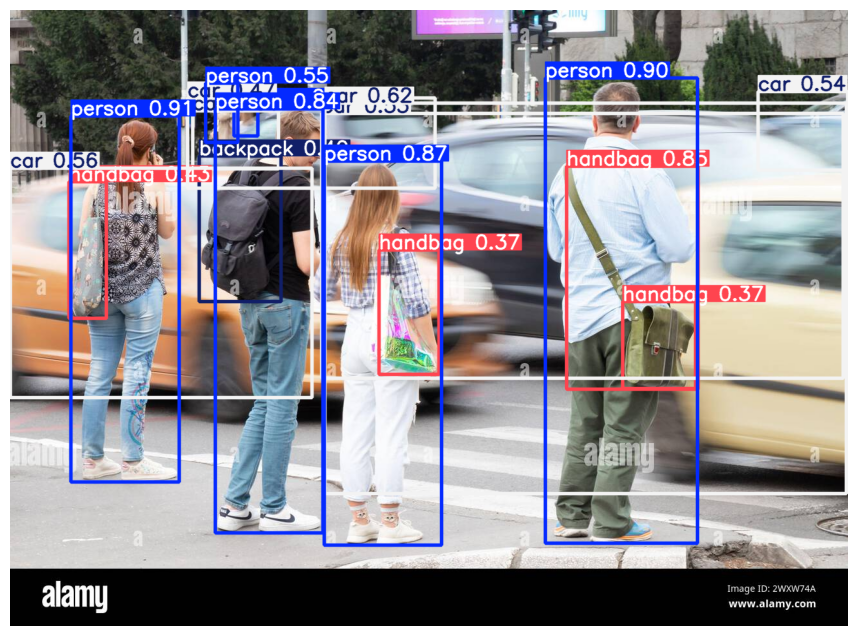

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Day 2: Object Detection on Video

Goal: Use YOLO to detect objects in video frames.
- Load and process video file frame-by-frame
- Save output video with bounding boxes

In [ ]:
upload = files.upload()
video_path = list(upload.keys())[0]
print("Uploaded:", video_path)

Saving 20 Seconds.mp4 to 20 Seconds.mp4
Uploaded: 20 Seconds.mp4


In [ ]:
output_path = "output_detected.mp4"
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) or 25.0
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame)
    annotated = results[0].plot()
    out.write(annotated)
    frame_count += 1
    if frame_count % 100 == 0:
        print(f"Processed {frame_count} frames")
cap.release()
out.release()

print(f"Video processing completed. Output saved to {output_path}")
files.download(output_path)


0: 640x384 2 persons, 253.7ms
Speed: 7.1ms preprocess, 253.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 211.6ms
Speed: 3.1ms preprocess, 211.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 221.8ms
Speed: 4.8ms preprocess, 221.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 219.2ms
Speed: 4.5ms preprocess, 219.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 207.6ms
Speed: 4.5ms preprocess, 207.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 134.6ms
Speed: 4.0ms preprocess, 134.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 132.2ms
Speed: 4.3ms preprocess, 132.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 130.4ms
Speed: 3.8ms preprocess, 130.4ms inference, 1.7ms postprocess per 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Day 3: Live Webcam Detection

Goal: Detect ojects from webcam feed in real time.
- Use OpenCV's webcam capture
- Display detection in real-time window

In [8]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import output
from base64 import b64decode

model = YOLO('yolov8n.pt')

Captured. Saved to snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 1 person, 1 bottle, 1 cell phone, 207.6ms
Speed: 2.7ms preprocess, 207.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


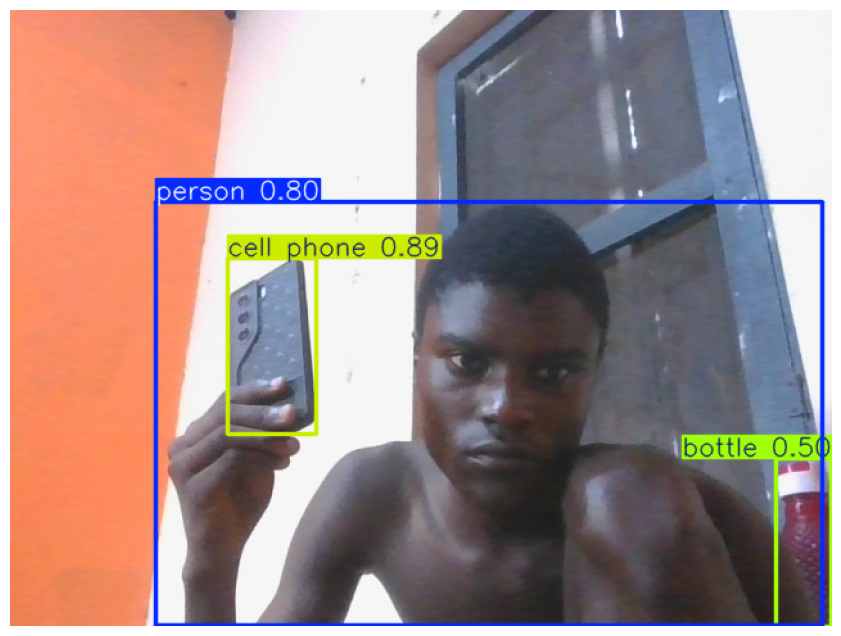

In [13]:
def take_photo(filename='snapshot.jpg'):
  js = """
   async function takePhoto() {
     const div = document.createElement('div');
     const capture = document.createElement('button');
     capture.textContent = 'Capture';
     div.appendChild(capture);
     document.body.appendChild(div);

     const video = document.createElement('video');
     video.style.display = 'block';
     const stream = await navigator.mediaDevices.getUserMedia({video: true});
     document.body.appendChild(video);
     video.srcObject = stream;
     await video.play();

     // Resize window
     google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

     // Wait for Capture button
     await new Promise((resolve) => capture.onclick = resolve);

     const canvas = document.createElement('canvas');
     canvas.width = video.videoWidth;
     canvas.height = video.videoHeight;
     canvas.getContext('2d').drawImage(video, 0, 0);
     stream.getTracks().forEach(track => track.stop());
     const imgData = canvas.toDataURL('image/jpeg').split(',')[1];

     div.remove();
     video.remove();
     return imgData;
   }
   takePhoto();
   """

  data = output.eval_js(js)
  with open(filename, 'wb') as f:
    f.write(b64decode(data))
  return filename

filename = take_photo('snapshot.jpg')
print(f'Captured. Saved to {filename}')

results = model(filename)
annotated = results[0].plot()

plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()